## Random Forest is a special case of Bagging by default , using DecisionTree 



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
     

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
X

array([[ 1.48697581, -1.80476561, -1.96988408,  0.50526314, -2.72173695],
       [ 0.56846234, -1.42727267, -0.80548682, -2.3137574 ,  0.38800926],
       [ 1.60515751, -1.30254685, -3.10006815,  1.36527509,  0.88550097],
       [ 0.88276388, -1.21492164, -3.37341097,  0.34975786,  1.37511397],
       [ 2.4459604 ,  1.80457259, -0.69007152,  1.34917614, -0.96393456],
       [-0.30318366,  1.91279401, -0.24526371,  1.0400097 , -2.22277246],
       [-0.13020133, -0.99600771, -1.9534815 ,  1.54333762, -0.25198762],
       [ 2.53414462,  3.93206077,  0.43221143, -0.34425671, -3.19788576],
       [ 0.72657687, -0.65469974, -1.37781653, -1.7206732 ,  0.45052657],
       [ 2.46232523,  3.27572906,  0.12576768,  2.77053591, -1.68386944],
       [ 1.01110522, -1.94836681, -1.22970924,  1.09392685, -1.82420982],
       [ 1.81286154,  1.77148011, -0.38693767, -0.18399058, -3.37876695],
       [-0.63519353, -2.07655705, -2.2704127 ,  0.12302447,  0.97307933],
       [-1.33821844, -1.93466413, -1.2

In [4]:
y

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

Creating a data frame 


In [5]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.486976,-1.804766,-1.969884,0.505263,-2.721737,1
1,0.568462,-1.427273,-0.805487,-2.313757,0.388009,1
2,1.605158,-1.302547,-3.100068,1.365275,0.885501,0
3,0.882764,-1.214922,-3.373411,0.349758,1.375114,0
4,2.445960,1.804573,-0.690072,1.349176,-0.963935,0


Creating the bagging classifier 

In [6]:
bag = BaggingClassifier(max_features=2)

- By default decision tree is the model created 
- and 10 estimators 

In [7]:
df.iloc[:,:5]

,col1,col2,col3,col4,col5
0,1.486976,-1.804766,-1.969884,0.505263,-2.721737
1,0.568462,-1.427273,-0.805487,-2.313757,0.388009
2,1.605158,-1.302547,-3.100068,1.365275,0.885501
3,0.882764,-1.214922,-3.373411,0.349758,1.375114
4,2.445960,1.804573,-0.690072,1.349176,-0.963935
...,...,...,...,...,...
95,-1.705644,-4.071665,-1.609948,0.658963,-0.809574
96,1.194096,-0.166874,-1.748642,1.937057,-0.350117
97,3.322344,0.631613,-0.387060,-3.801285,0.407582
98,0.361256,-1.610422,-1.748843,-0.531841,-2.873374


In [8]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

PLotting each 10 estimators ie., all the 10 Decisiontree Classifier along with the 2 features

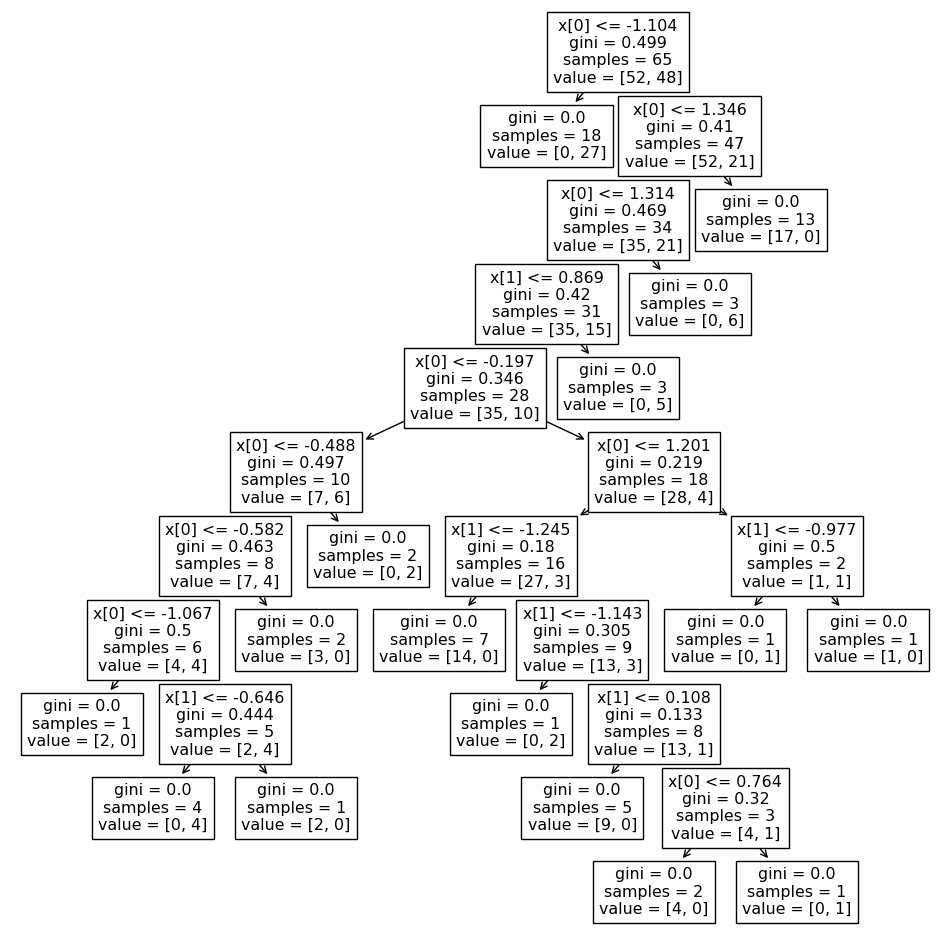

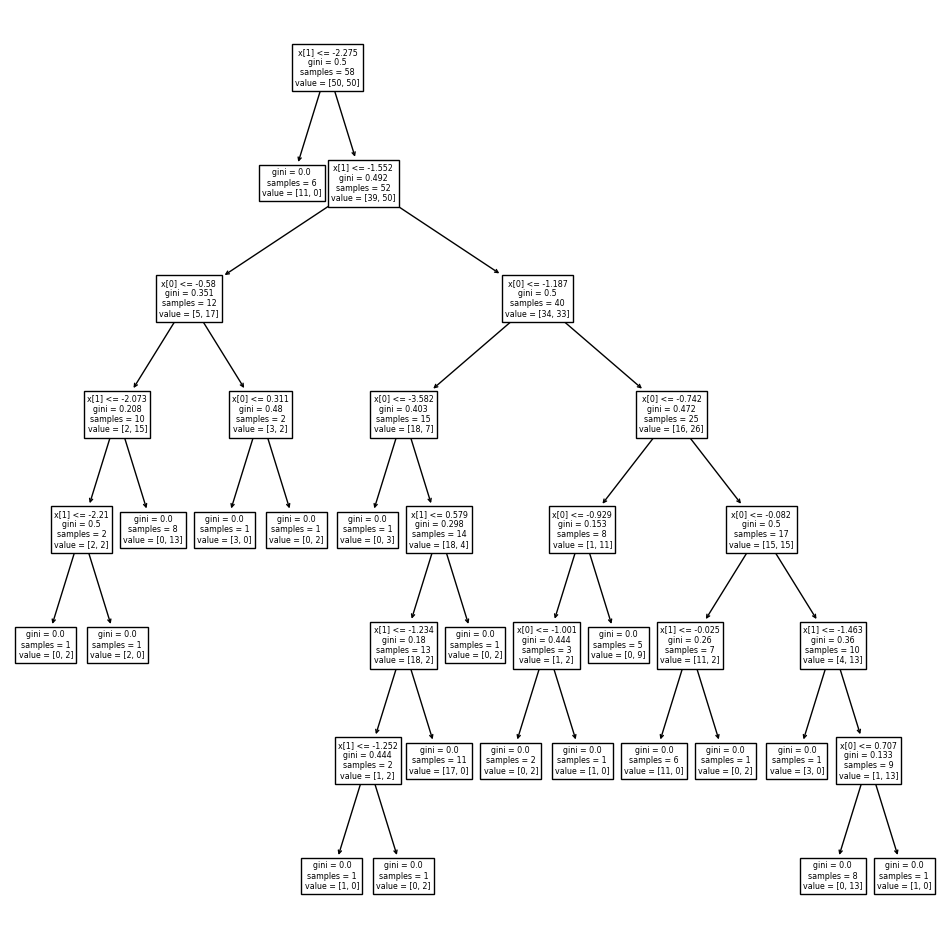

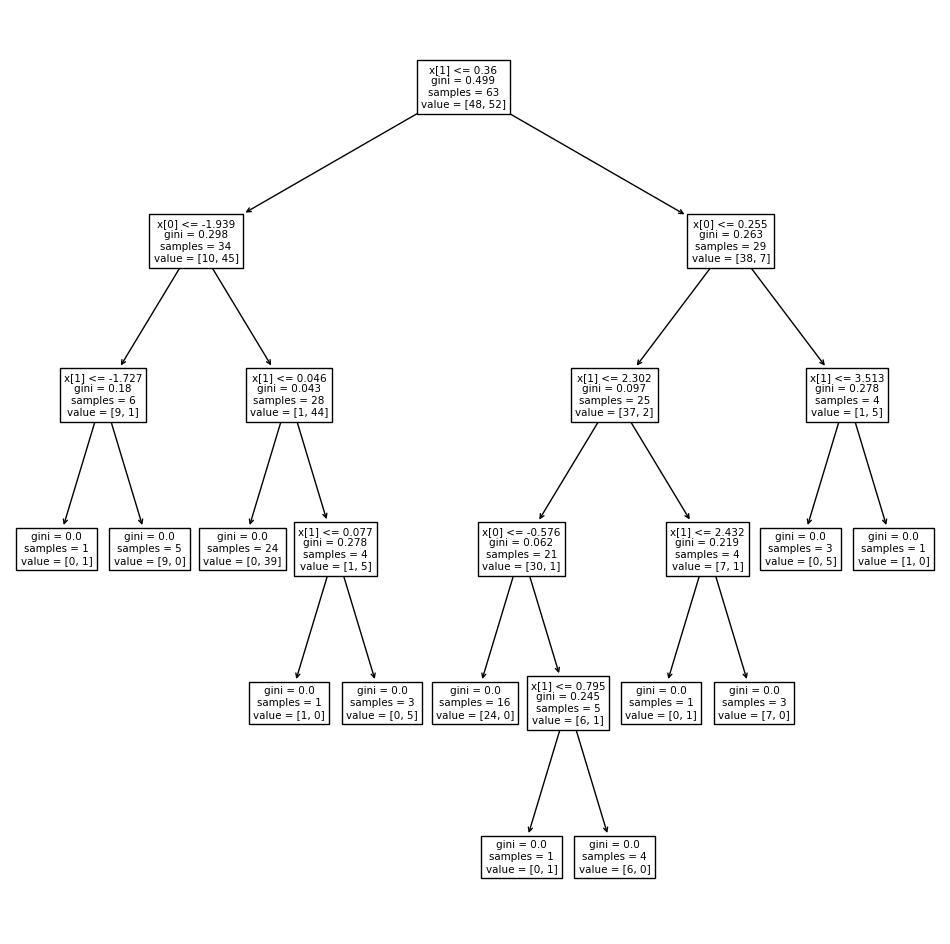

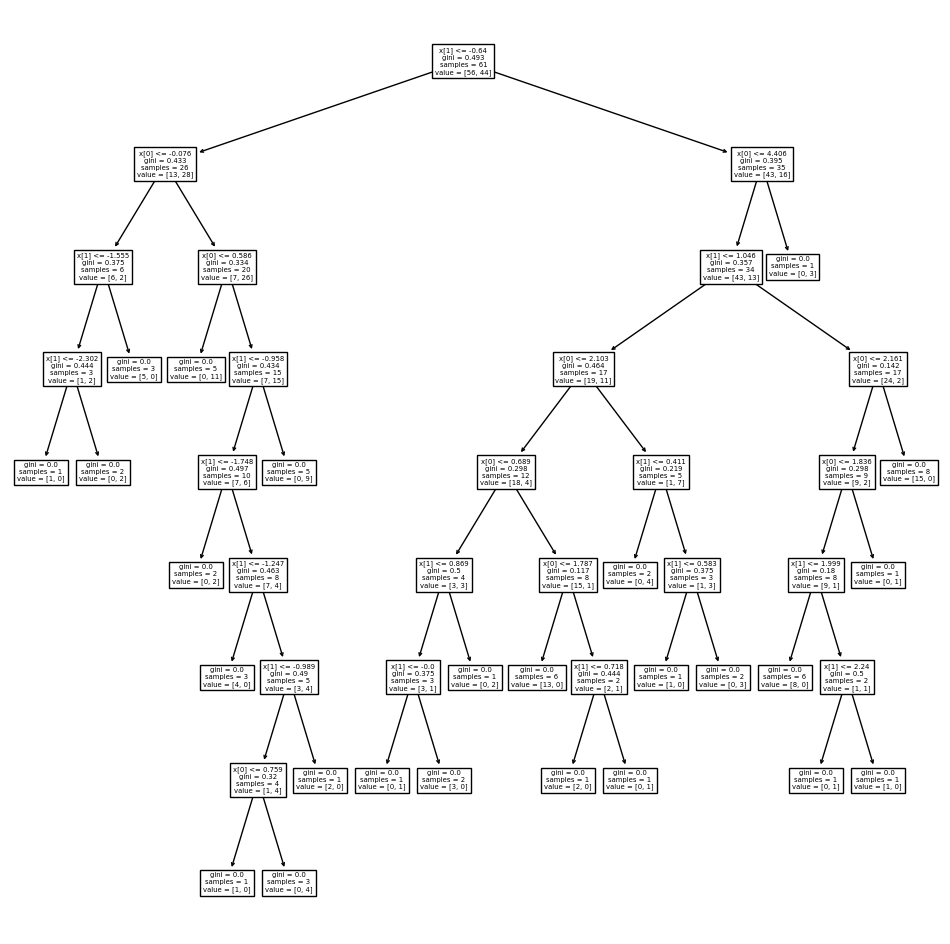

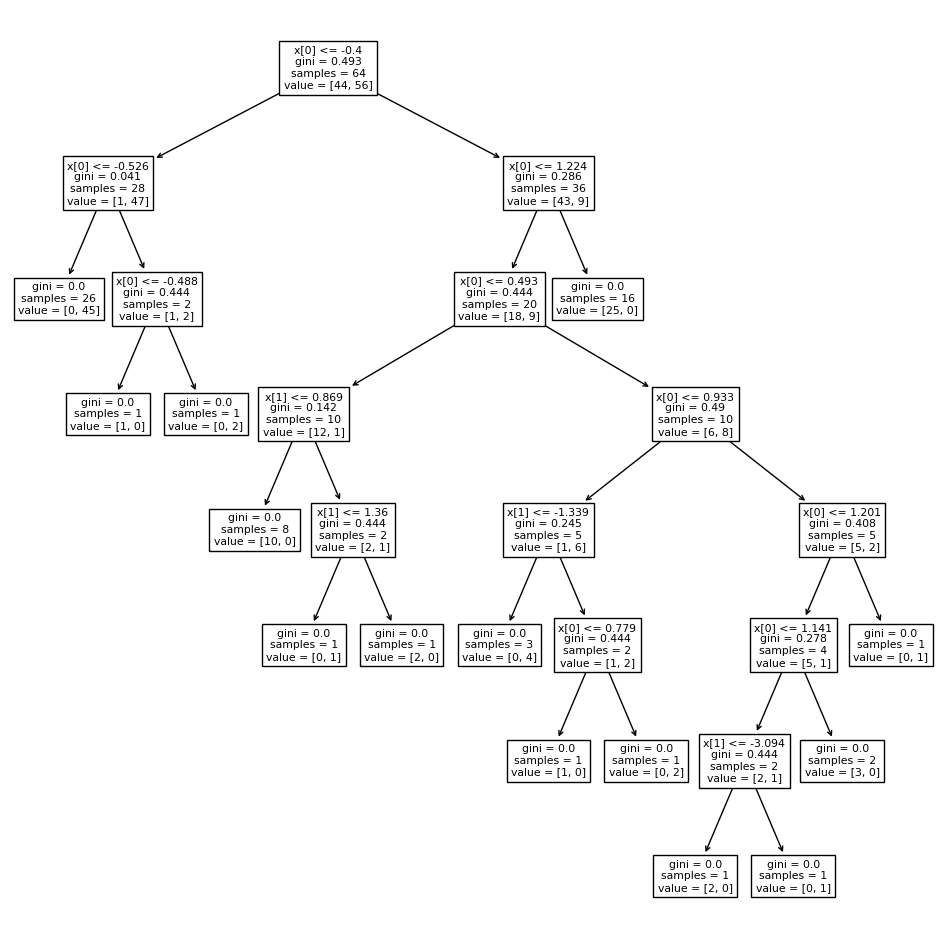

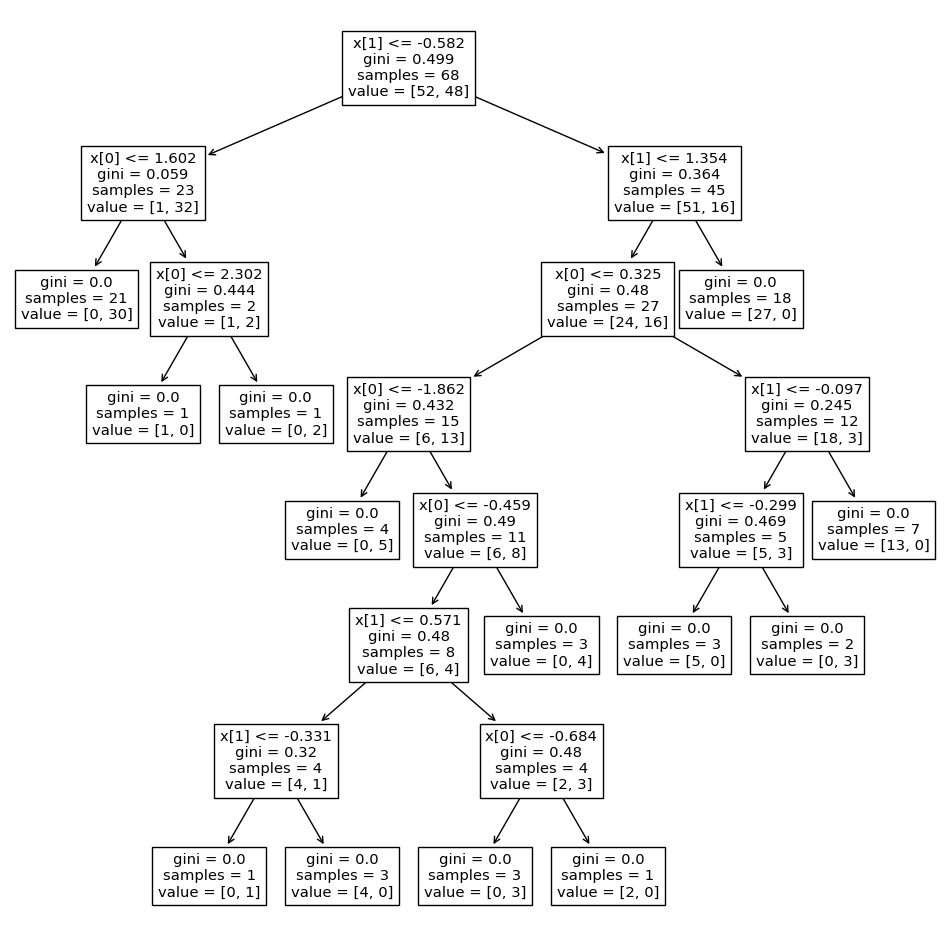

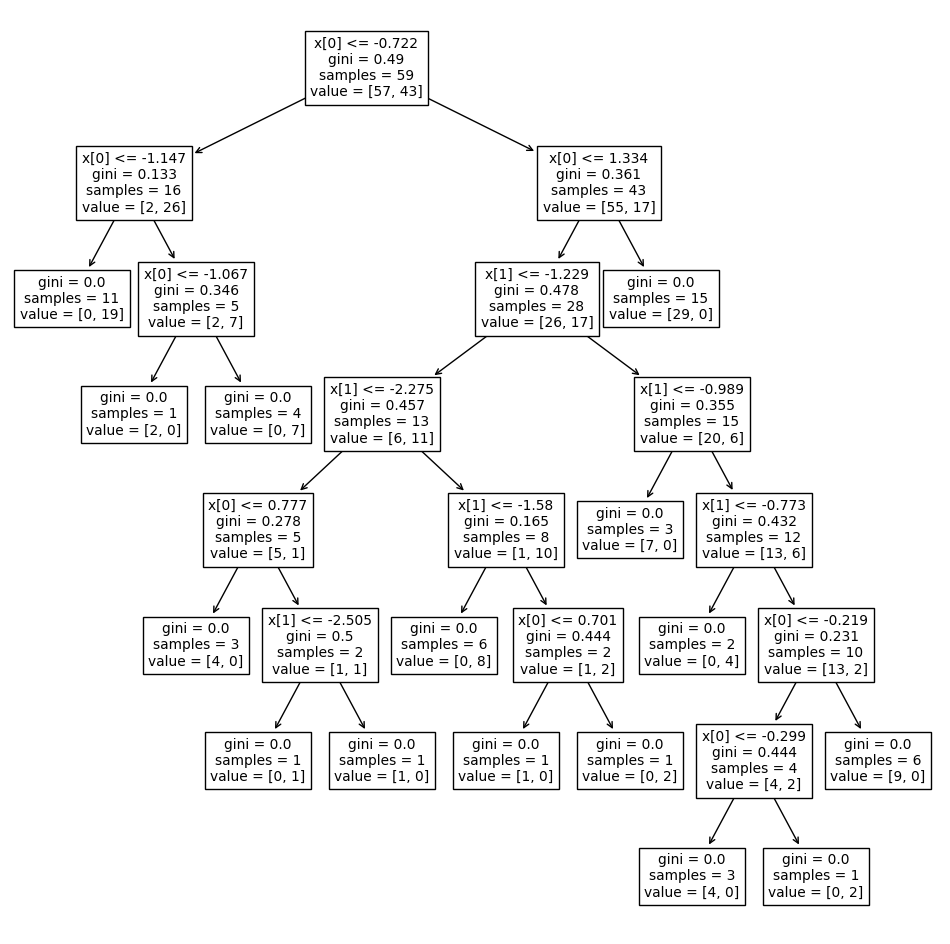

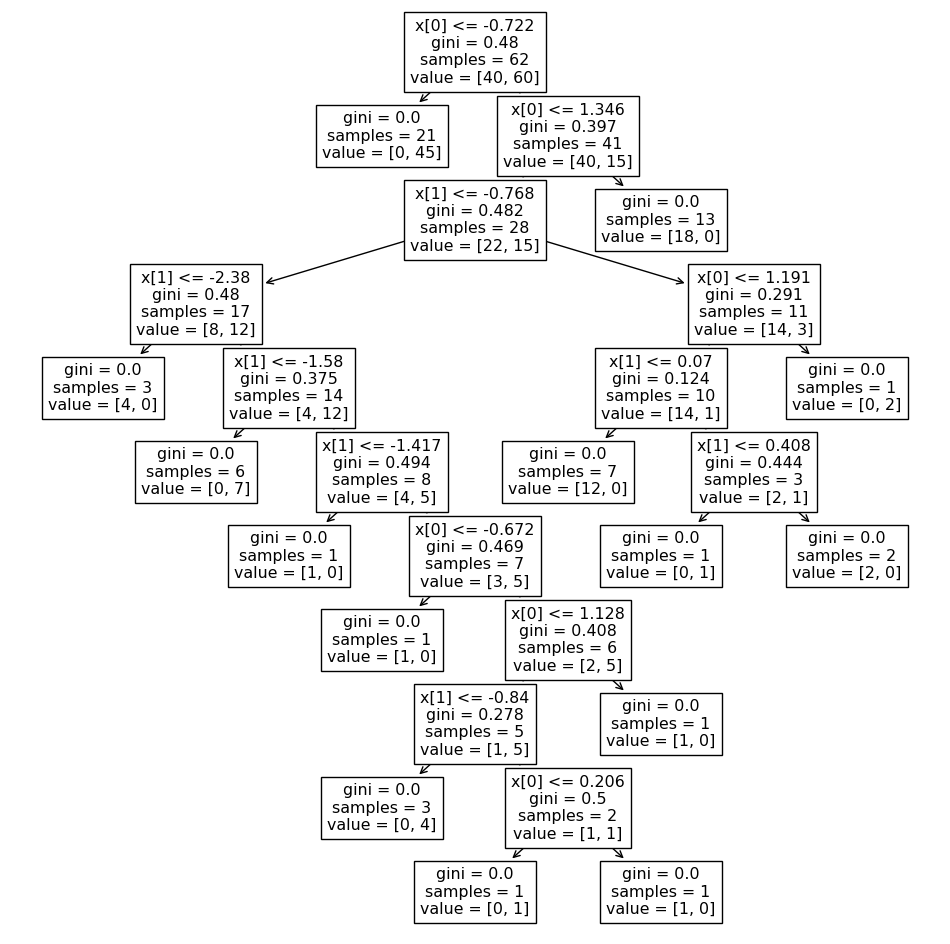

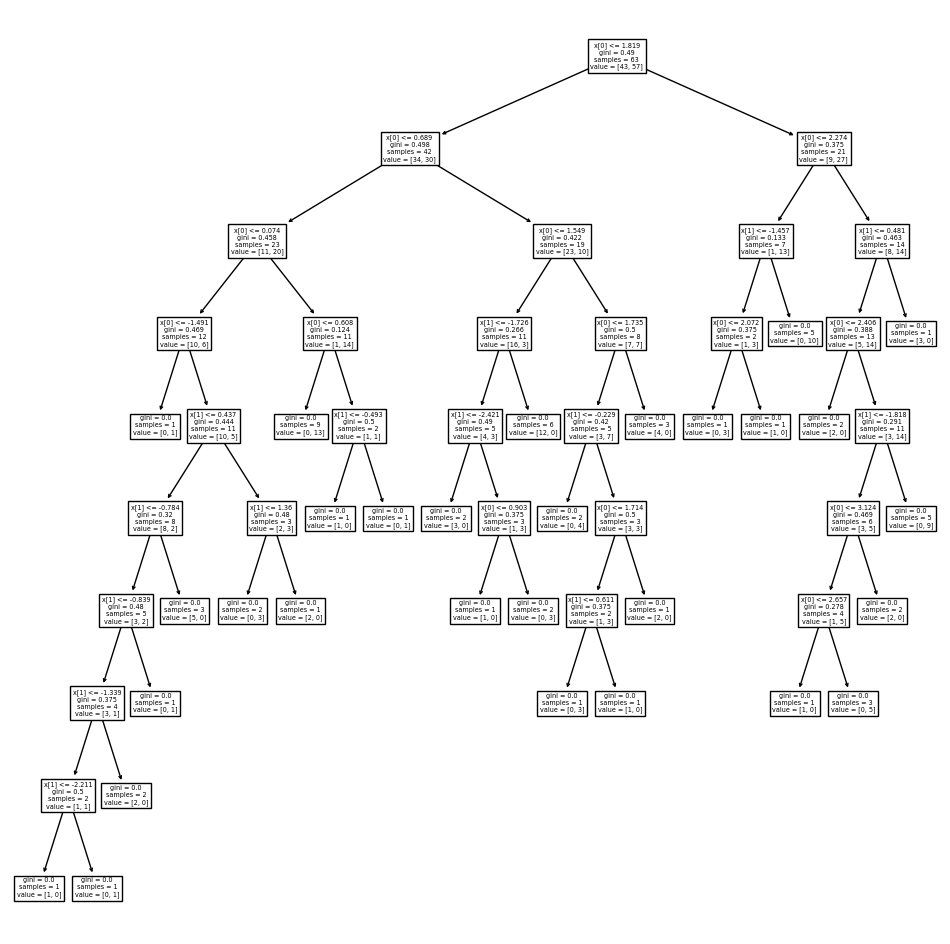

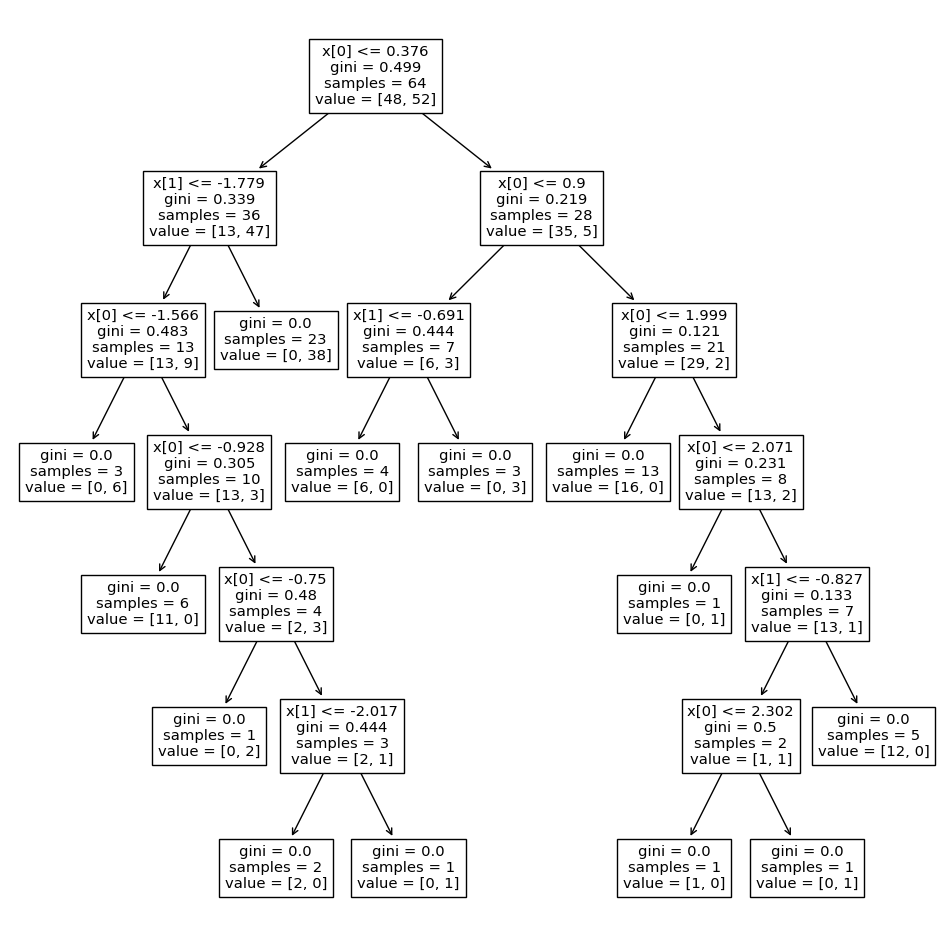

In [9]:
for i in range(0,10):
    plt.figure(figsize=(12,12))
    plot_tree(bag.estimators_[i])
    plt.show()

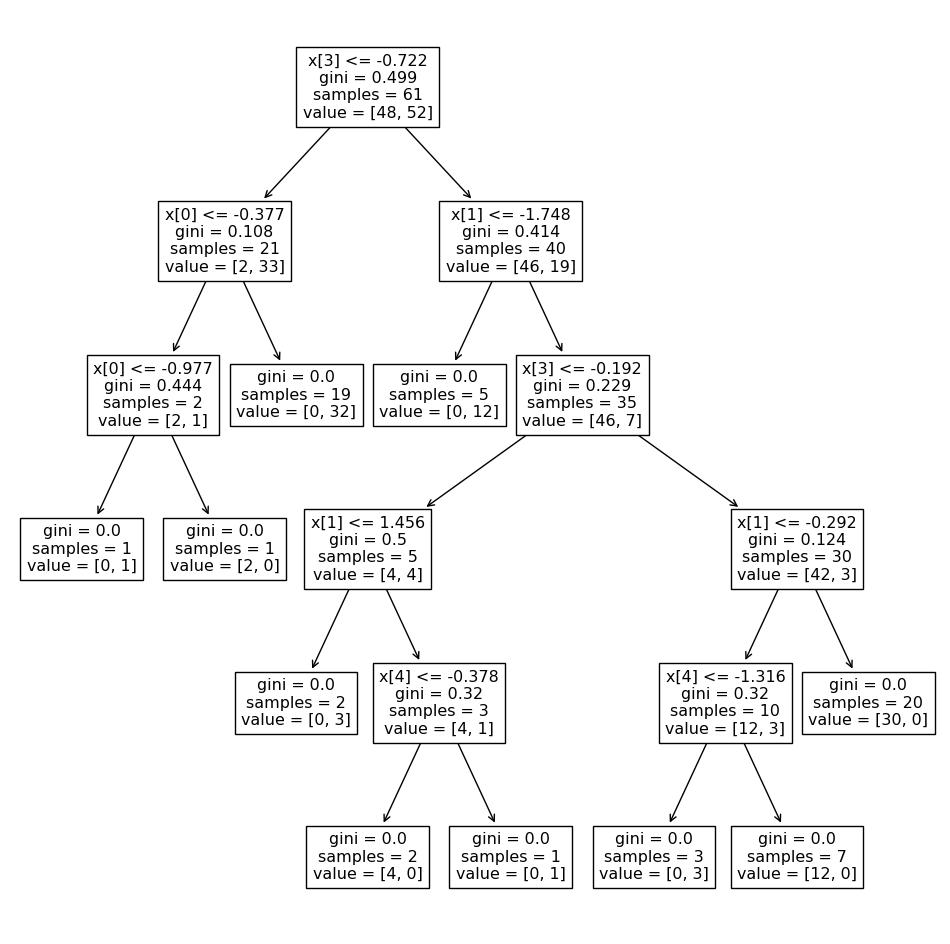

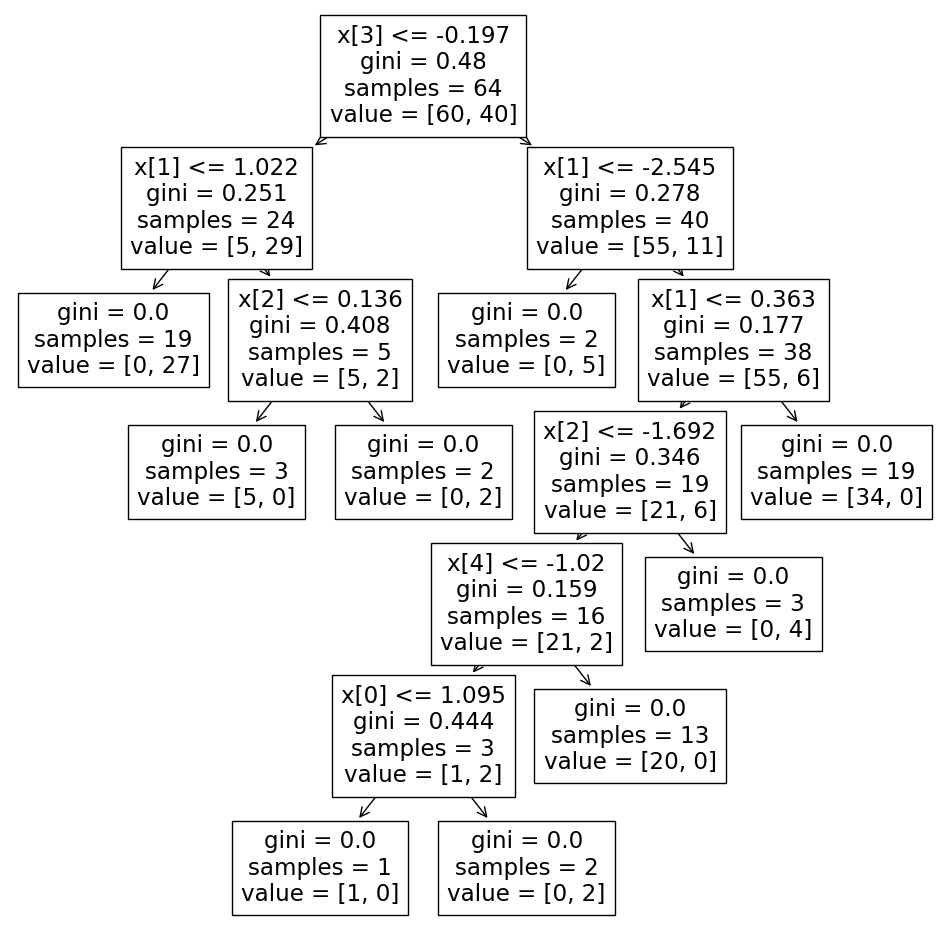

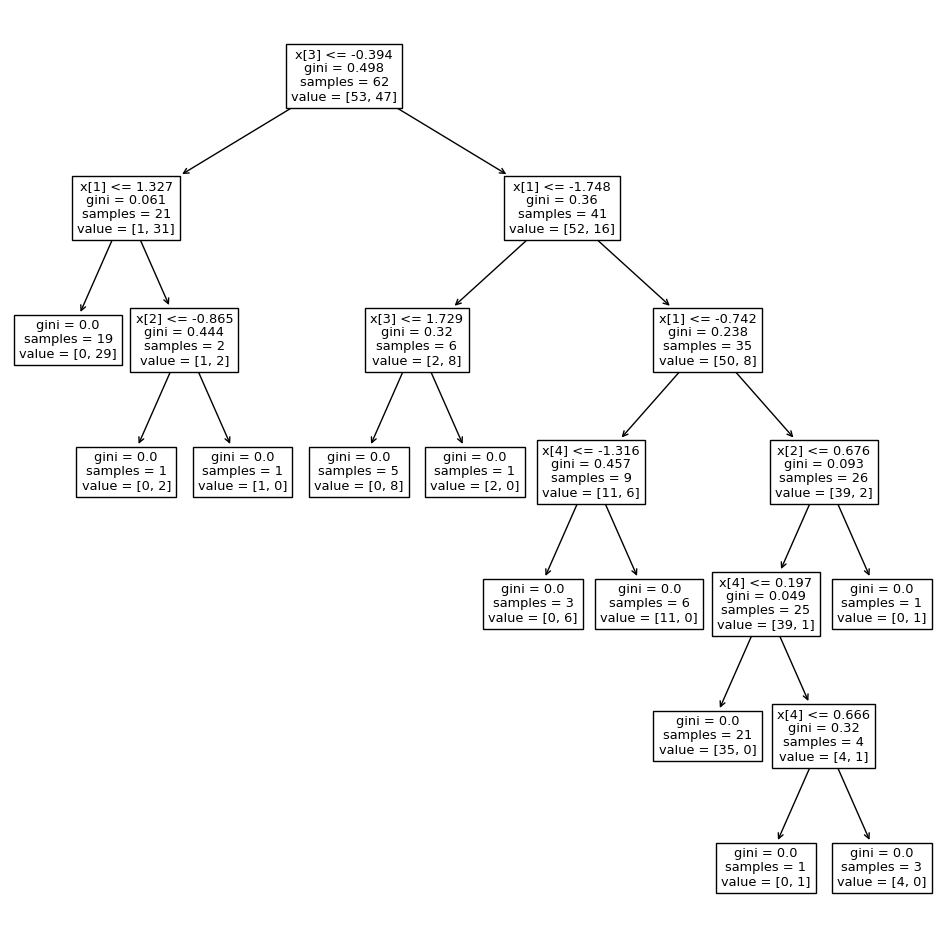

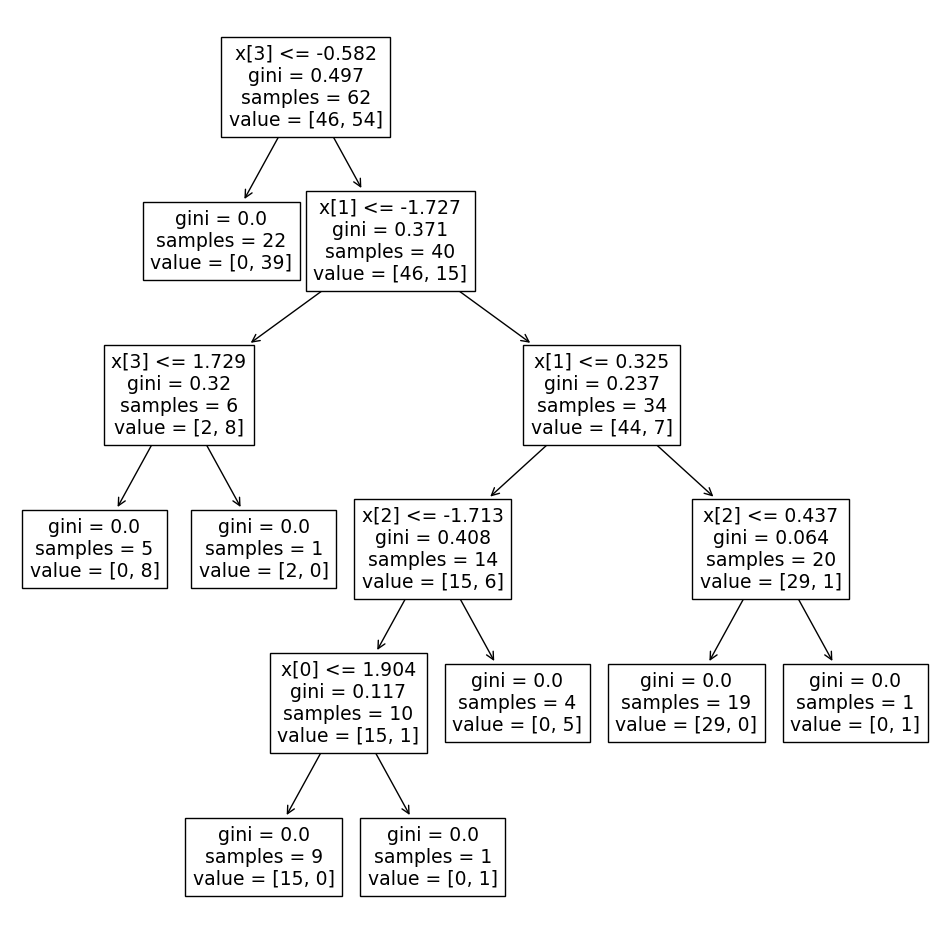

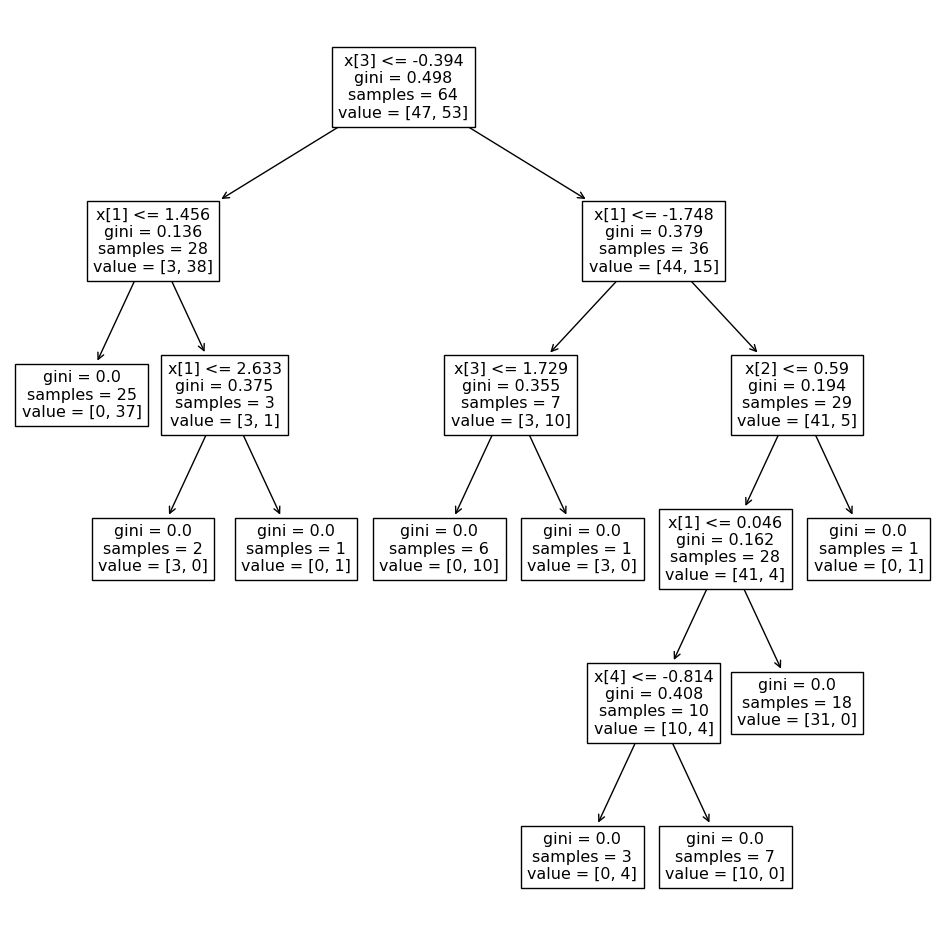

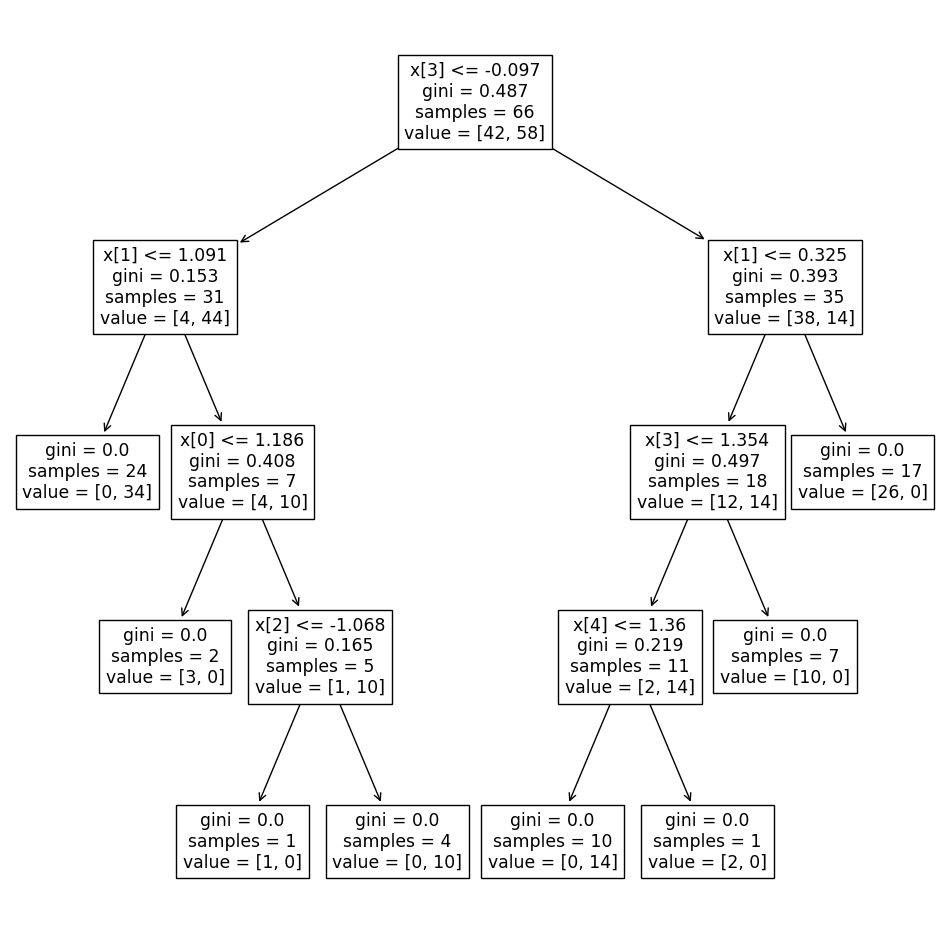

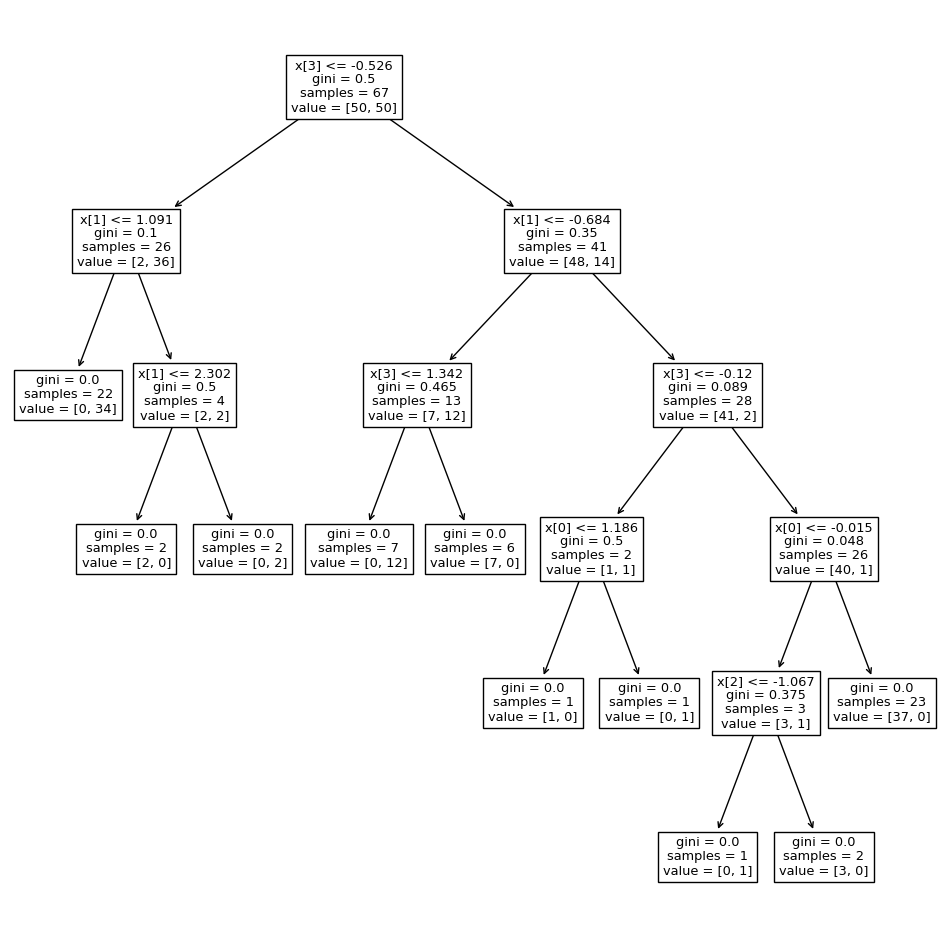

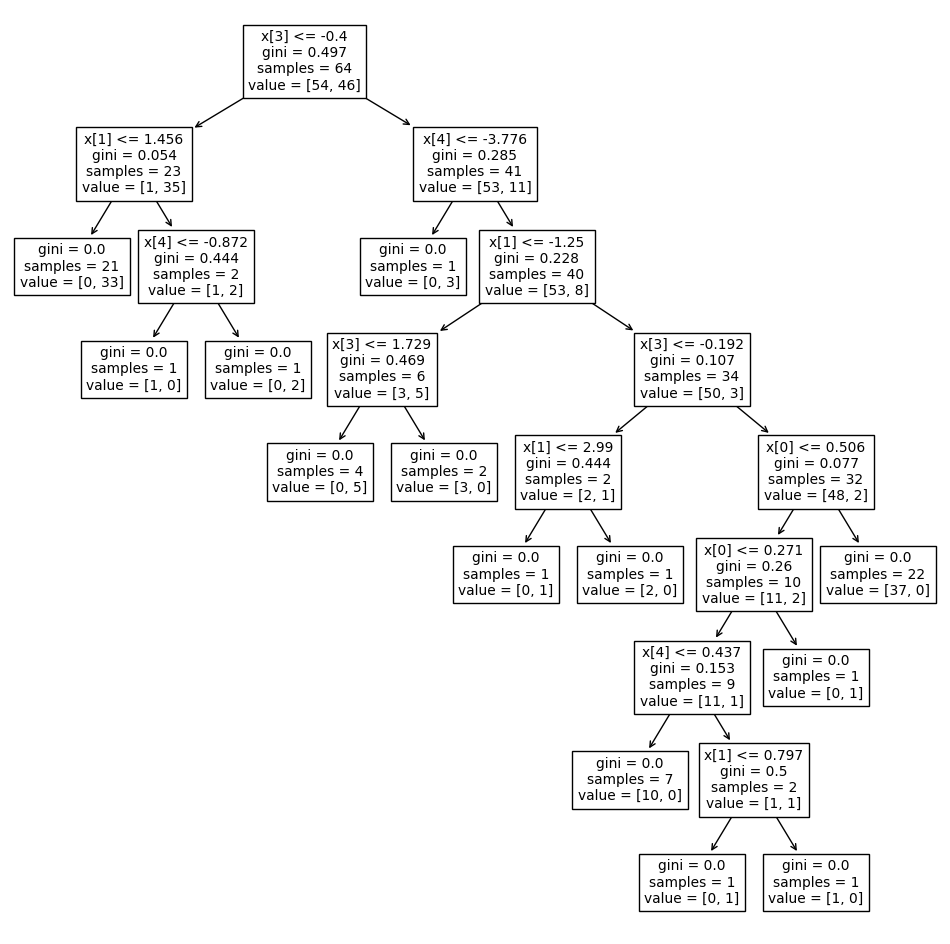

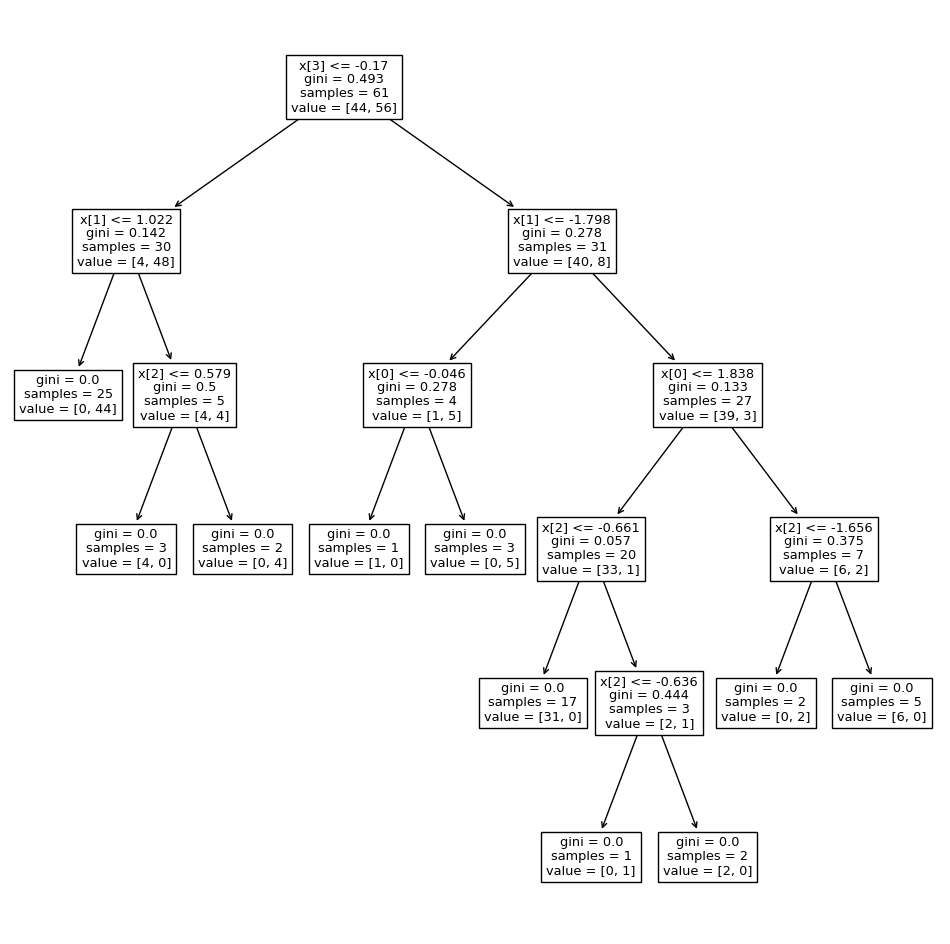

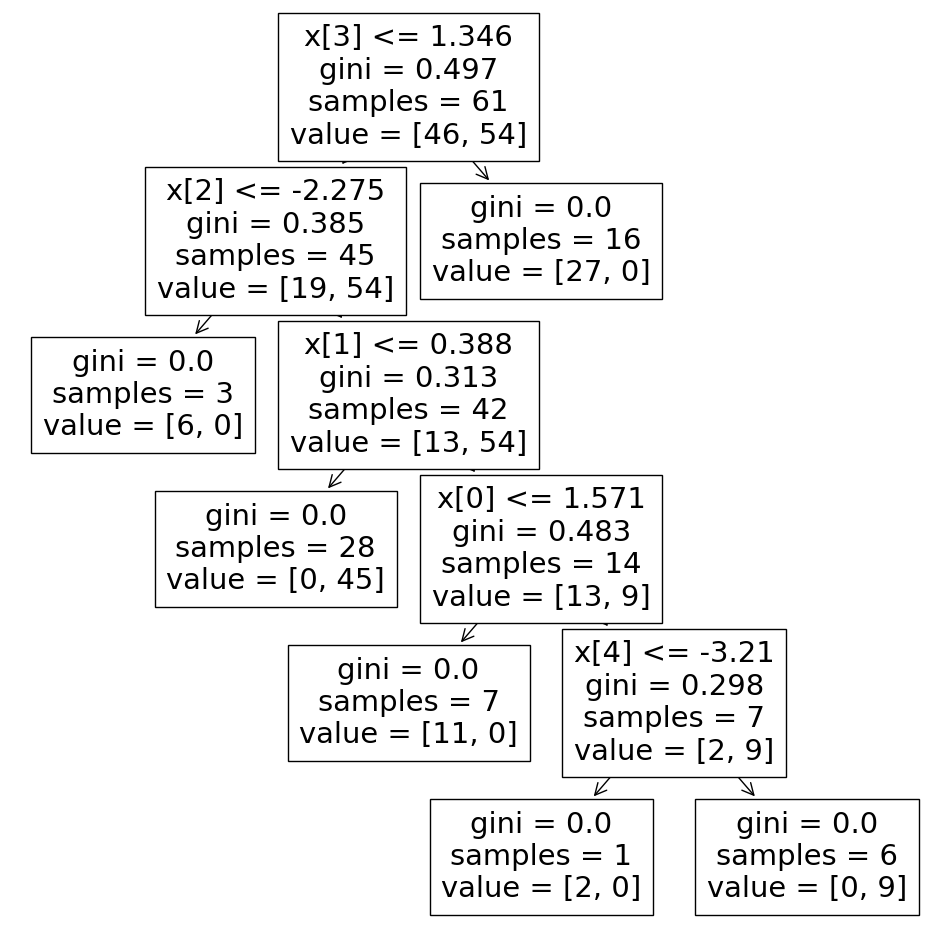

In [10]:
bag = BaggingClassifier()
bag.fit(df.iloc[:,:5],df.iloc[:,-1])
for i in range(0,10):
    plt.figure(figsize=(12,12))
    plot_tree(bag.estimators_[i])
    plt.show()

In [11]:
RF = RandomForestClassifier()

In [12]:
RF.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier()

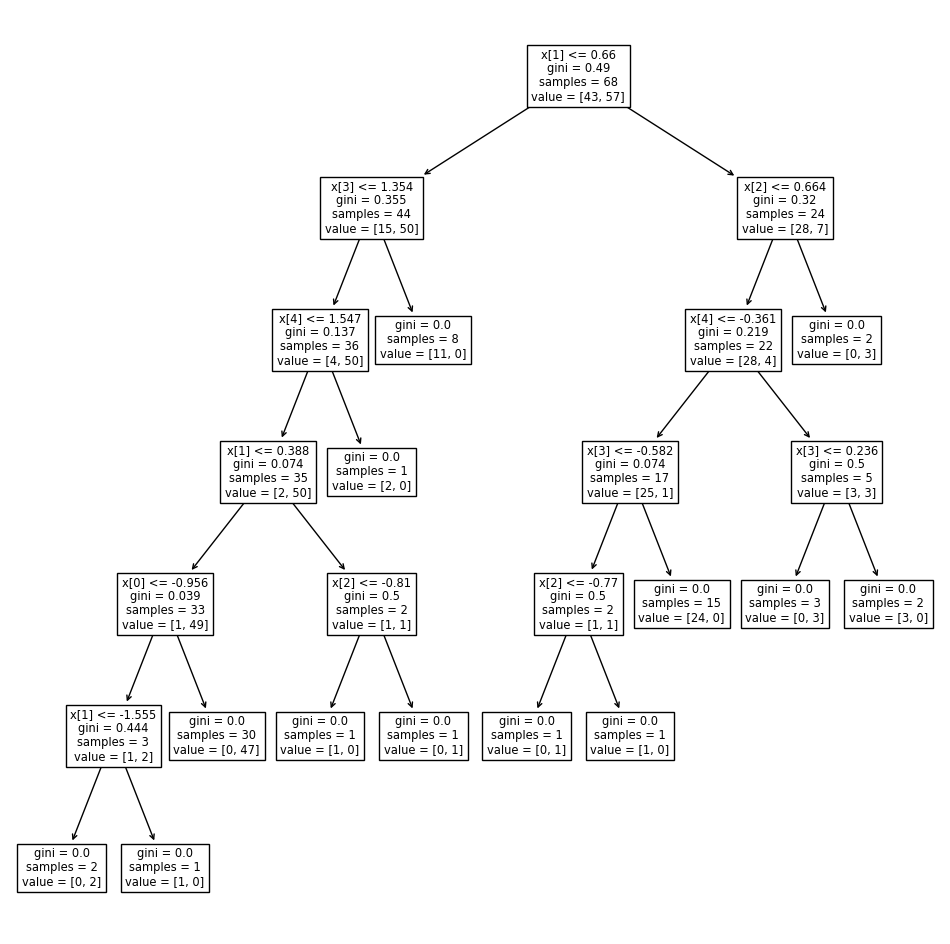

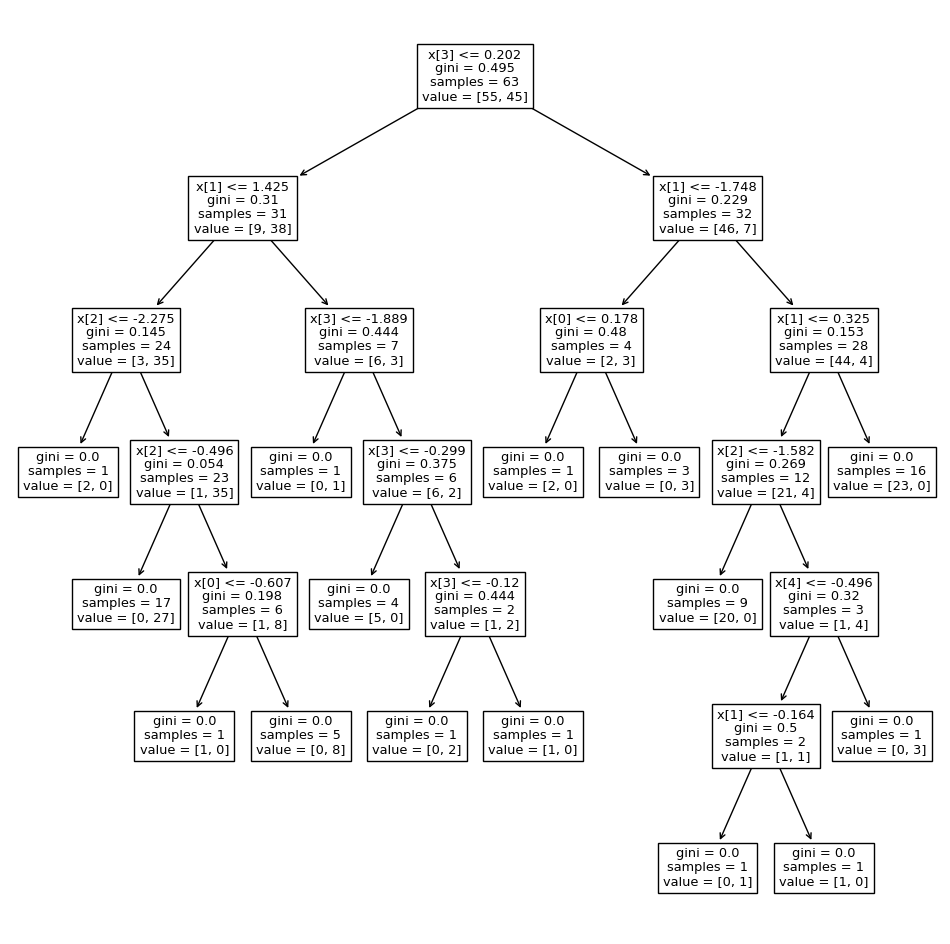

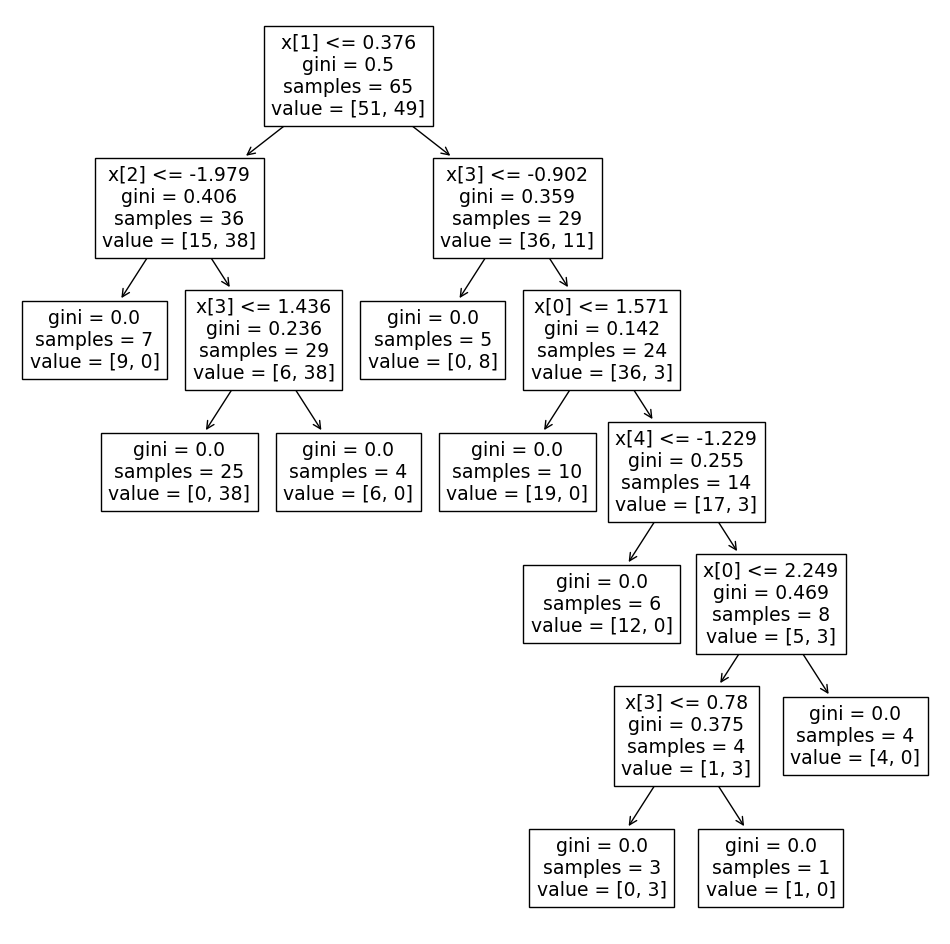

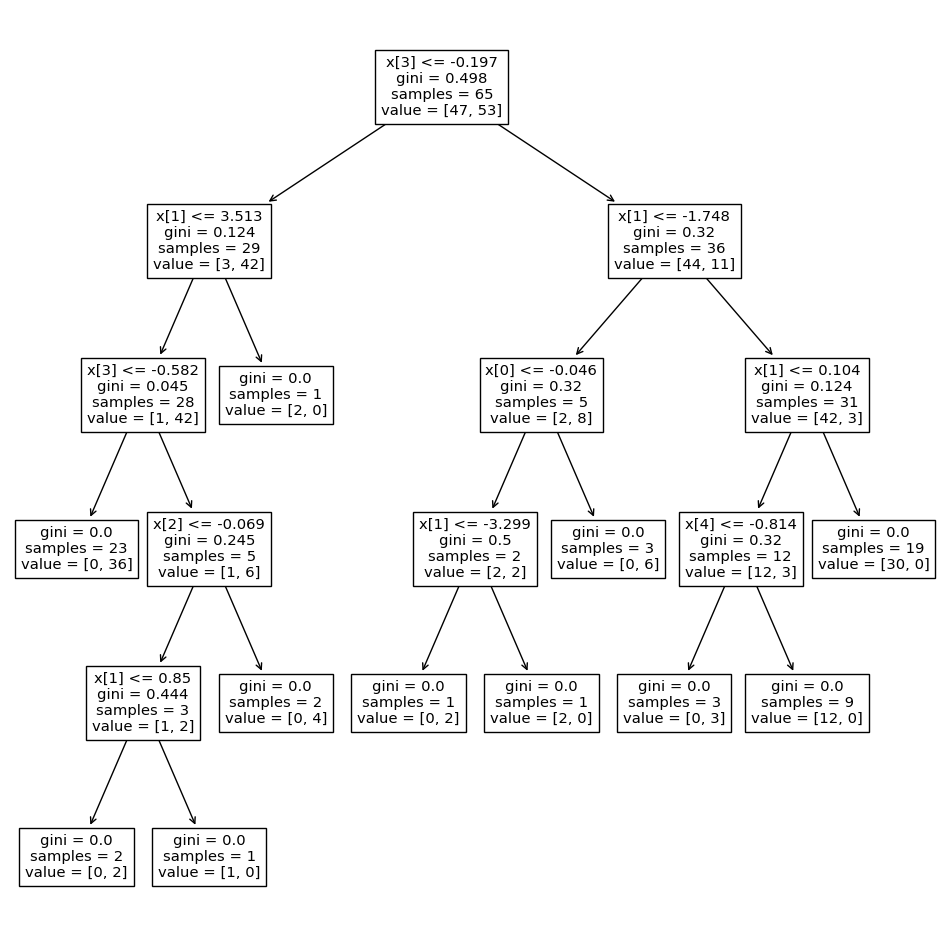

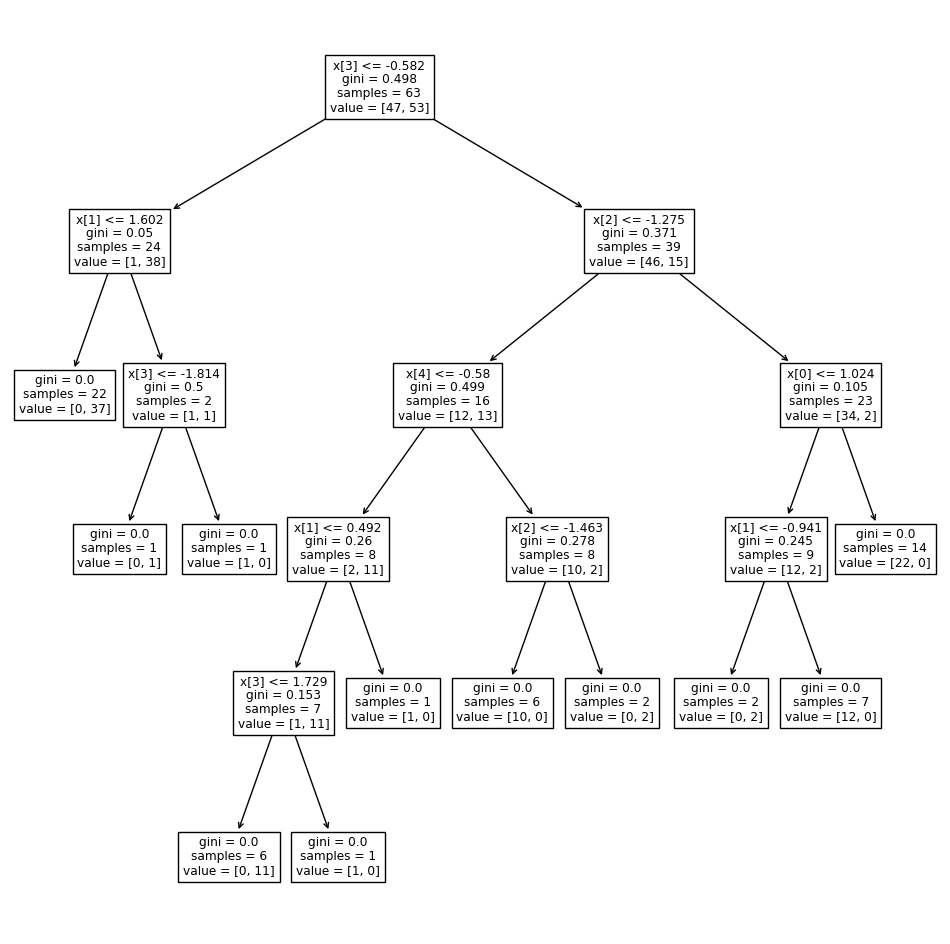

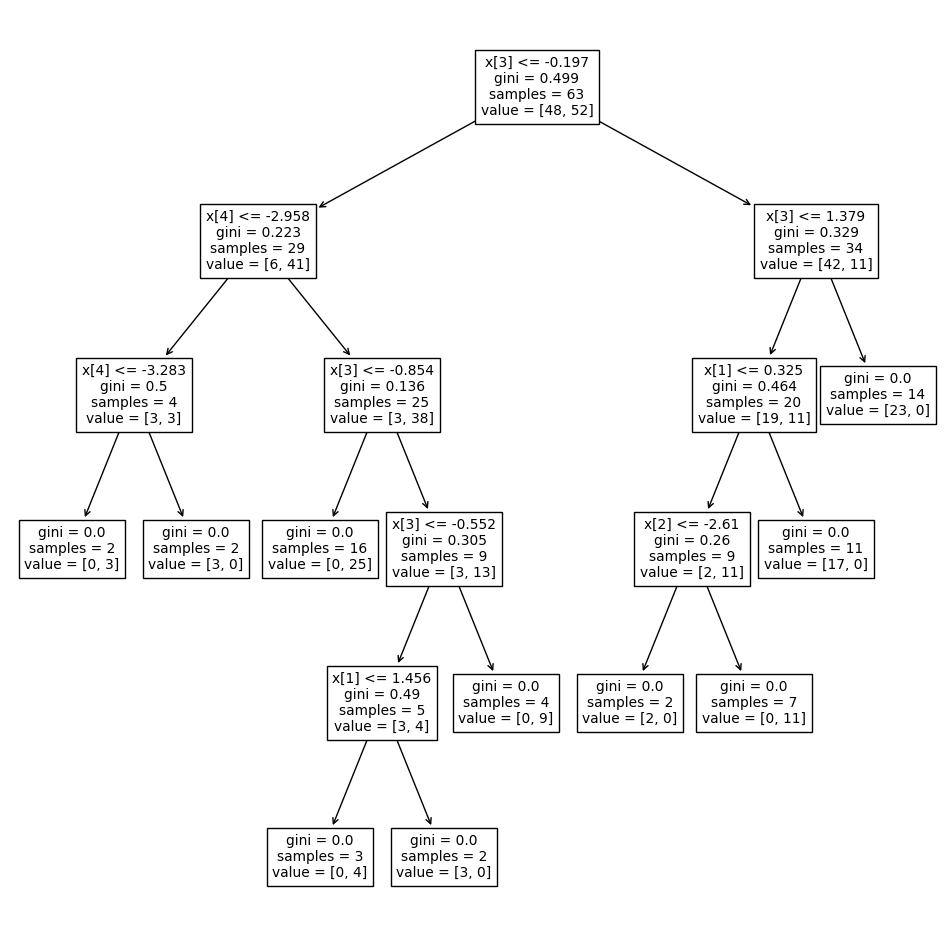

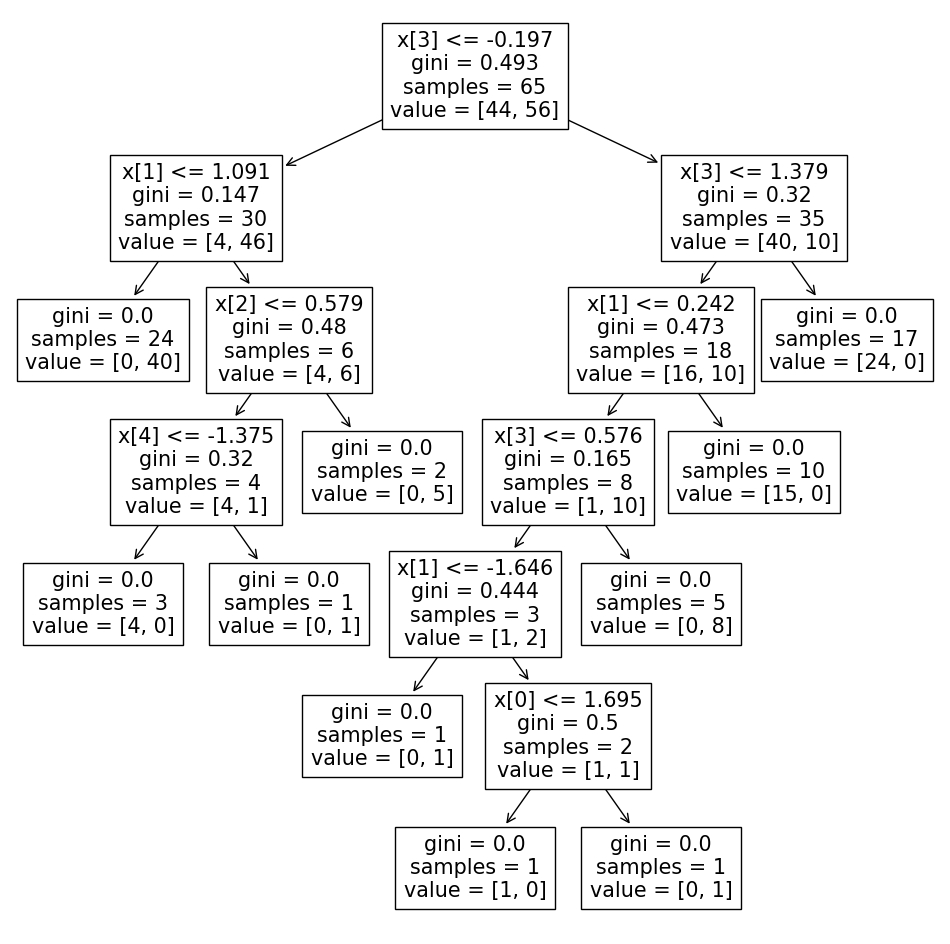

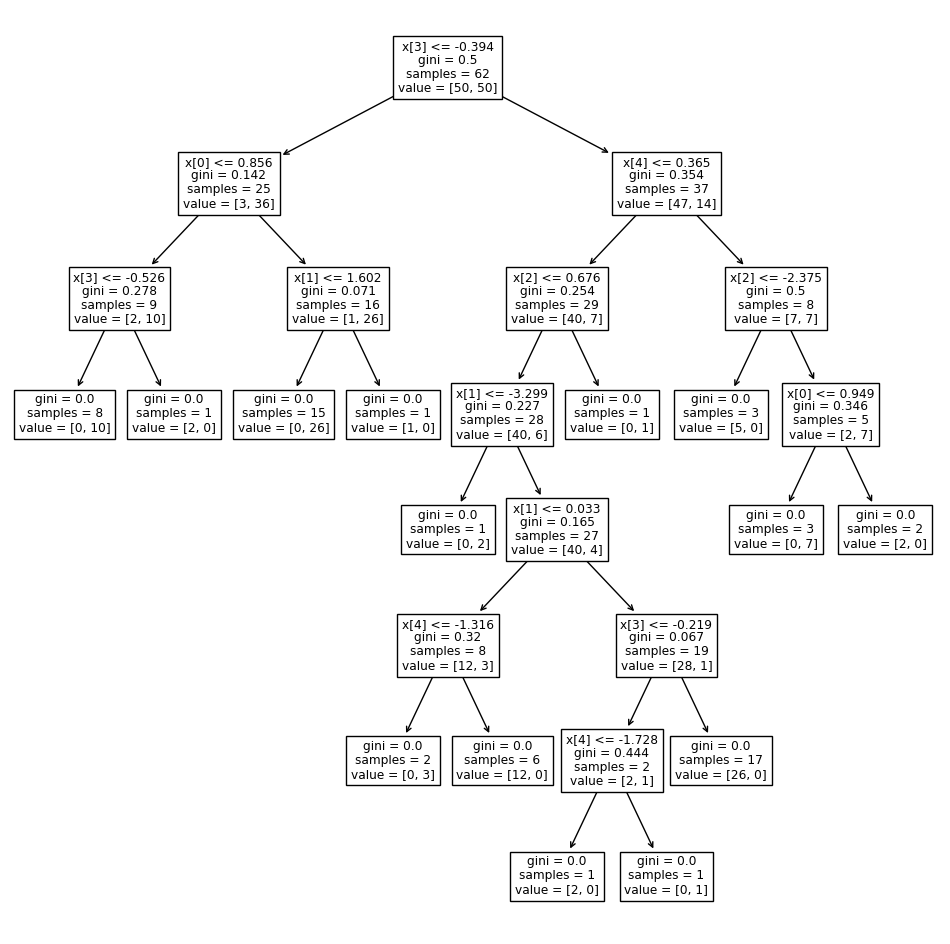

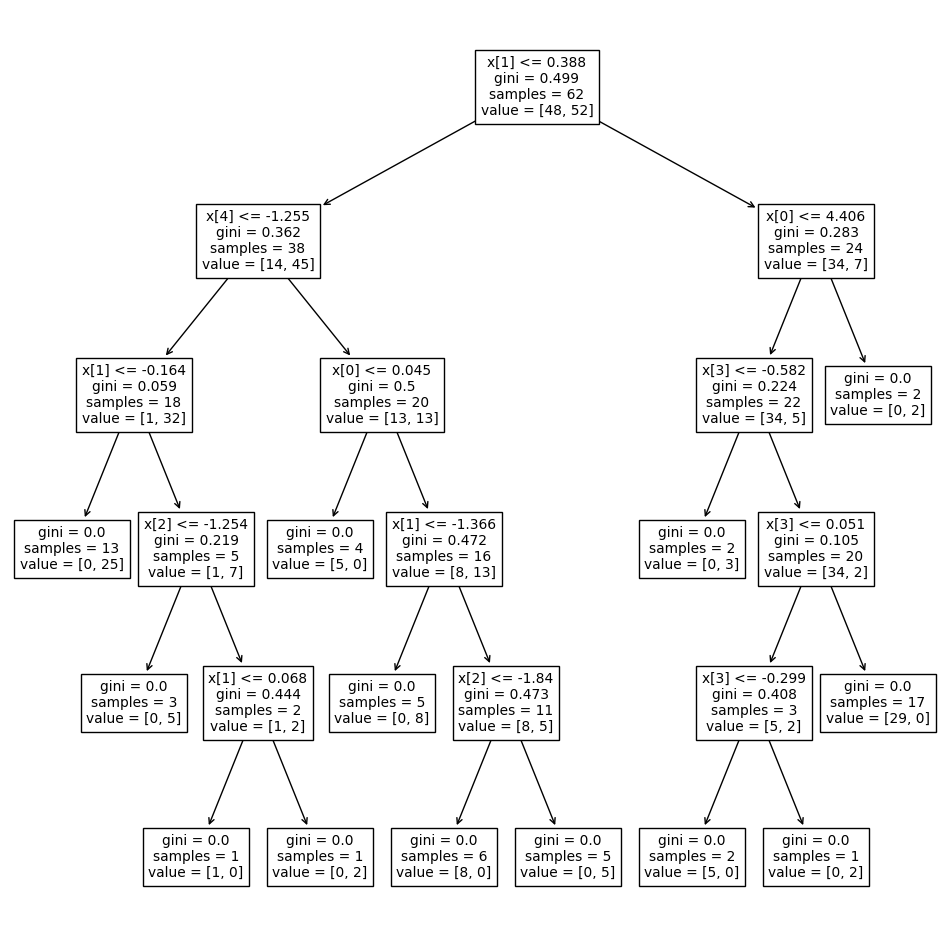

In [13]:
for i in range(0,9):
    plt.figure(figsize=(12,12))
    plot_tree(RF.estimators_[i])
    plt.show()

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


- age 
- sex
- chest pain type (cp)
- resting blood pressure (trestbps)
- cholesterol level (chol)
- fasting blood sugar (fbs)
- rest ECG results (restecg)
- maximum heart rate achieved (thalach)
- exercise-induced angina (exang)
- ST depression induced by exercise relative to rest (oldpeak)
- slope of the peak exercise ST segment (slope)
- number of major vessels colored by fluoroscopy (ca)
- thalassemia type (thal)
- the target variable indicating the presence or absence of heart disease.

In [21]:
df.shape

(303, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
X = df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


Creating the object for each classifier 


In [24]:
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
SVC = SVC()
LOR=LogisticRegression()

### Random forest

Fitting the model 


In [25]:
RF.fit(X_train,y_train)

RandomForestClassifier()

Predicting 

In [28]:
RF_pred = RF.predict(X_test)
accuracy_score(y_test,RF_pred)*100

85.24590163934425

### Gradient Boosting


In [29]:
GB.fit(X_train,y_train)
GB_pred = GB.predict(X_test)
accuracy_score(y_test,GB_pred)*100

77.04918032786885

### SVC

In [31]:
SVC.fit(X_train,y_train)
SVC_pred = SVC.predict(X_test)
accuracy_score(y_test,SVC_pred)*100

70.49180327868852

### Logistic Regression

In [32]:
LOR.fit(X_train,y_train)
LOR_pred = LOR.predict(X_test)
accuracy_score(y_test,LOR_pred)*100

d:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.52459016393442

By changing the hyperparameters , we can increase the accuracy of our model

In [54]:
RF2 = RandomForestClassifier(max_samples=0.75,random_state=42)
RF2.fit(X_train,y_train)
y_pred_RF2 = RF2.predict(X_test)
accuracy_score(y_test,y_pred_RF2)*100

90.1639344262295

### **By changing one parameter we get 90% accuracy**

max-sample = 0.75 --> only using 75% of the data 

In [57]:
RF3 = RandomForestClassifier(max_samples=0.75,max_depth= 8, max_features=0.2, n_estimators=60,random_state=42)
RF3.fit(X_train,y_train)
y_pred_RF3 = RF3.predict(X_test)
accuracy_score(y_test,y_pred_RF3)*100

90.1639344262295

## Cross validation

In [41]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))
print(np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy')))

[0.90322581 0.80645161 0.83870968 0.9        0.93333333 0.83333333
 0.83333333 0.83333333 0.73333333 0.76666667]
0.8348387096774192


10 folds value 

## Hyper parameter Tuning 

##

## 1.GridSearchCV

In [33]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [34]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [35]:
RF= RandomForestClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV
RF_grid = GridSearchCV(estimator = RF, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

RF_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

Total combinations = 4 × 3 × 3 × 3 = 108


In [39]:
RF_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 60}

In [40]:
RF_grid.best_score_

0.8347789115646259

We have found out the best hyper parameters 

## Random Search CV

In [58]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]


In [59]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [60]:
RF4 = RandomForestClassifier()

In [62]:
from sklearn.model_selection import RandomizedSearchCV

RF_RSCV = RandomizedSearchCV(estimator = RF4, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [63]:
RF_RSCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ANACONDA\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
d:\ANACONDA\Lib\site-packages\sklearn\model_sel

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [64]:
RF_RSCV.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': 2,
 'bootstrap': True}

In [66]:
RF_RSCV.best_score_*100

84.6938775510204

In [67]:
RF5= RandomForestClassifier(n_estimators =20,
 min_samples_split =2,
 min_samples_leaf=2,
 max_samples=1.0,
 max_features =0.2,
 max_depth=2,
 bootstrap=True)

In [69]:
RF5.fit(X_train,y_train)
y_pred_RF5 = RF5.predict(X_test)
accuracy_score(y_test,y_pred_RF5)*100

88.52459016393442


feature selection based on Fi, oob_score, stacking


boosting

clustering
navie bayes
KNN
PCA

